<a href="https://colab.research.google.com/github/ArielRzz/ArielRzz/blob/main/GERMINAR_MODELO_INICIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive')


In [3]:
!pip install rarfile


In [4]:
import os
import zipfile
import rarfile

# Ruta de la carpeta donde están los archivos .zip y .rar
ruta_carpeta = "/content/drive/MyDrive/dataset_germinar"

# Ruta de la carpeta donde se descomprimirán los archivos
ruta_carpeta_destino = "/content/dataset_germinar"

# Lista de archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

for archivo in archivos:
    # Ruta completa del archivo
    ruta_archivo = os.path.join(ruta_carpeta, archivo)

    # Descomprimir el archivo dependiendo de su extensión
    if archivo.endswith(".zip"):
        with zipfile.ZipFile(ruta_archivo, 'r') as zip_ref:
            zip_ref.extractall(ruta_carpeta_destino)
    elif archivo.endswith(".rar"):
        with rarfile.RarFile(ruta_archivo, 'r') as rar_ref:
            rar_ref.extractall(ruta_carpeta_destino)



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Eliminar carpeta con sus archivos dentro
#import shutil

# # Ruta de la carpeta que quieres eliminar
#ruta_carpeta = "/content/dataset_entorno"

# # Eliminar la carpeta y todos sus archivos
#shutil.rmtree(ruta_carpeta)

In [5]:
import os

# Ruta de la carpeta donde están las subcarpetas con imágenes
ruta_carpeta = "/content/dataset_germinar"

# Lista de subcarpetas en la carpeta
subcarpetas = os.listdir(ruta_carpeta)

for subcarpeta in subcarpetas:
    # Ruta completa de la subcarpeta
    ruta_subcarpeta = os.path.join(ruta_carpeta, subcarpeta)

    # Lista de imágenes en la subcarpeta
    imagenes = os.listdir(ruta_subcarpeta)

    # Contar el número de imágenes
    num_imagenes = len(imagenes)

    print(f"La subcarpeta '{subcarpeta}' tiene {num_imagenes} imágenes.")


La subcarpeta 'Coliflor_enfermo' tiene 450 imágenes.
La subcarpeta 'Coliflor_saludable' tiene 559 imágenes.
La subcarpeta 'tomate_enfermo' tiene 111 imágenes.
La subcarpeta 'lechuga_sano' tiene 234 imágenes.
La subcarpeta 'lechuga_enfermo' tiene 97 imágenes.
La subcarpeta 'tomate_sano' tiene 290 imágenes.


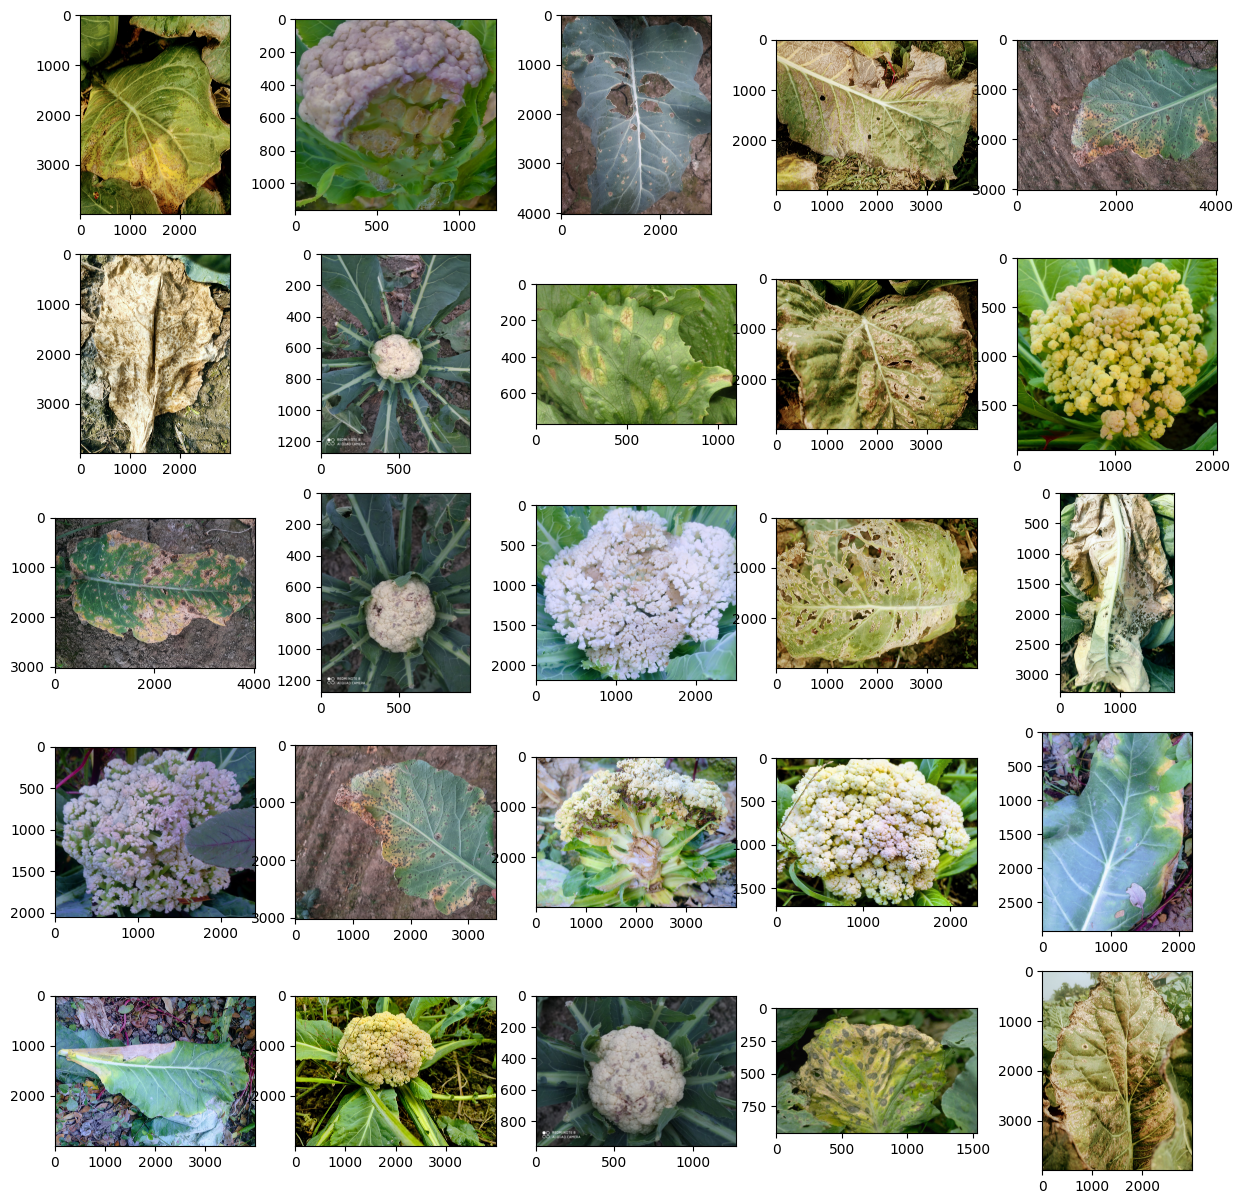

In [6]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/dataset_germinar/Coliflor_enfermo'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [7]:
import os
import shutil

# Ruta de la carpeta donde están las subcarpetas con imágenes
ruta_carpeta_fuente = "/content/dataset_germinar"

# Ruta de la carpeta donde se copiarán las imágenes
ruta_carpeta_destino = "/content/dataset_419"

# Lista de subcarpetas en la carpeta
subcarpetas = os.listdir(ruta_carpeta_fuente)

for subcarpeta in subcarpetas:
    # Ruta completa de la subcarpeta fuente
    ruta_subcarpeta_fuente = os.path.join(ruta_carpeta_fuente, subcarpeta)

    # Ruta completa de la subcarpeta destino
    ruta_subcarpeta_destino = os.path.join(ruta_carpeta_destino, subcarpeta)

    # Crear la subcarpeta destino si no existe
    if not os.path.exists(ruta_subcarpeta_destino):
        os.makedirs(ruta_subcarpeta_destino)

    # Lista de imágenes en la subcarpeta fuente
    imagenes = os.listdir(ruta_subcarpeta_fuente)

    contador = 0
    for i, nombreimg in enumerate(imagenes):
        if i < 97:
            # Copia de la imagen de la subcarpeta fuente a la subcarpeta destino
            shutil.copy(ruta_subcarpeta_fuente + '/' + nombreimg, ruta_subcarpeta_destino + '/' + nombreimg)
            contador += 1

    print(f"Carpeta {subcarpeta} ... OK, {contador} imágenes copiadas.")



Carpeta Coliflor_enfermo ... OK, 97 imágenes copiadas.
Carpeta Coliflor_saludable ... OK, 97 imágenes copiadas.
Carpeta tomate_enfermo ... OK, 97 imágenes copiadas.
Carpeta lechuga_sano ... OK, 97 imágenes copiadas.
Carpeta lechuga_enfermo ... OK, 97 imágenes copiadas.
Carpeta tomate_sano ... OK, 97 imágenes copiadas.


In [13]:
!pip install tensorflow

Found 459 images belonging to 6 classes.
Found 112 images belonging to 6 classes.


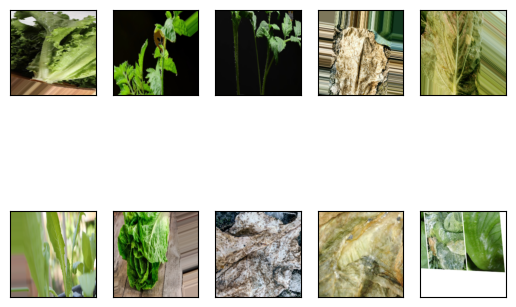

In [8]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset_419', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset_419', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [9]:
import tensorflow as tf
import tensorflow_hub as hub

# Definimos la URL del modelo preentrenado MobileNetV2 en TensorFlow Hub
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Cargamos el modelo MobileNetV2 como una capa Keras utilizando la URL definida anteriormente
# La capa se puede usar en un modelo Keras como cualquier otra capa
# El parámetro input_shape=(224,224,3) define la forma de los datos de entrada que se espera que reciba el modelo: imágenes de 224x224 píxeles con 3 canales de color (RGB)
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [10]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [11]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(6, activation='softmax')
])

In [12]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2265670 (8.64 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [13]:
#Compilar
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
#Entrenar el modelo
EPOCAS = 80

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/80
15/15 [==============================] - 25s 1s/step - loss: 1.6958 - accuracy: 0.3595 - val_loss: 1.5212 - val_accuracy: 0.4375
Epoch 2/80
15/15 [==============================] - 18s 1s/step - loss: 1.0969 - accuracy: 0.6166 - val_loss: 1.2916 - val_accuracy: 0.5268
Epoch 3/80
15/15 [==============================] - 18s 1s/step - loss: 0.8063 - accuracy: 0.7407 - val_loss: 1.2832 - val_accuracy: 0.5625
Epoch 4/80
15/15 [==============================] - 18s 1s/step - loss: 0.7019 - accuracy: 0.7712 - val_loss: 0.9530 - val_accuracy: 0.6339
Epoch 5/80
15/15 [==============================] - 18s 1s/step - loss: 0.5842 - accuracy: 0.8083 - val_loss: 1.0015 - val_accuracy: 0.6518
Epoch 6/80
15/15 [==============================] - 18s 1s/step - loss: 0.5139 - accuracy: 0.8453 - val_loss: 0.8745 - val_accuracy: 0.6964
Epoch 7/80
15/15 [==============================] - 18s 1s/step - loss: 0.4497 - accuracy: 0.8497 - val_loss: 0.8265 - val_accuracy: 0.6964
Epoch 8/80
15/15 [==

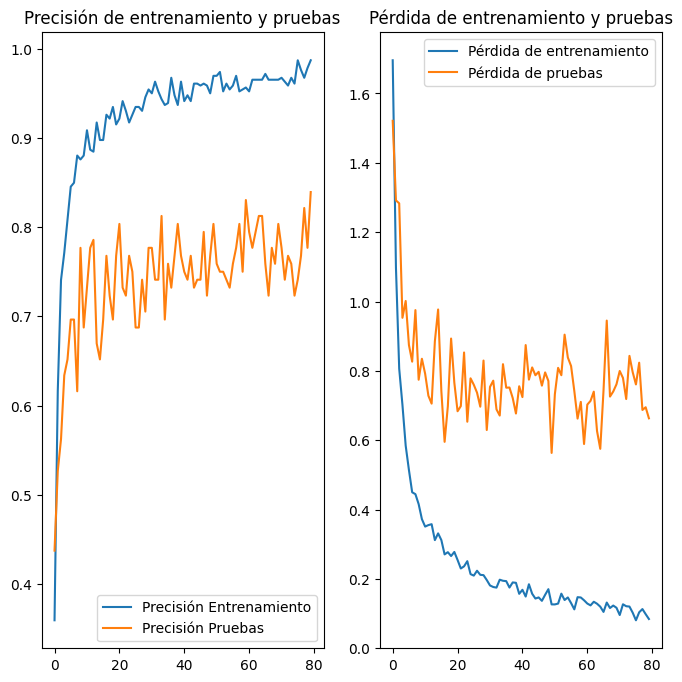

In [15]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(80)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [17]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
!pip install Pillow-SIMD

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.9/849.9 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow-SIMD: filename=Pillow_SIMD-9.0.0.post1-cp310-cp310-linux_x86_64.whl size=1238176 sha256=580d9be0cebc326e38177636940dbc8a0d83154b17ac26d1bd7c6142d2dddac9
  Stored in directory: /root/.cache/pip/wheels/5b/40/80/c3580fdb22f9cc7362b26cac344b501994785f96329a3f6b94
Successfully built Pillow-SIMD


In [18]:
url = 'https://prismab.com/wp-content/uploads/2022/06/lechuga-de-invierno.jpg' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 1s 1s/step
3


In [19]:
def predict(image_url):
  # Descarga la imagen de la URL
  response = requests.get("https://i1.wp.com/www.chispis.com/wp-content/uploads/2016/12/tomates.jpg?fit=1024,998&ssl=1")
  response.raise_for_status()  # Verifica que la descarga fue exitosa

  # Convierte la imagen a un array de NumPy
  img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
  img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

  # Preprocesa la imagen
  img = cv2.resize(img, (224, 224))
  img_array = img / 255.0
  img_batch = np.expand_dims(img_array, axis=0)

  # Haz la predicción
  prediction = modelo.predict(img_batch)
  return np.argmax(prediction)

In [ ]:
# from PIL import Image
# import requests
# from io import BytesIO
# import cv2

# def categorizar(url):
#   try:
#     respuesta = requests.get(url)
#     img = Image.open(BytesIO(respuesta.content))
#     img = np.array(img).astype(float)/255
#     img = cv2.resize(img, (224,224))
#     prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
#     return np.argmax(prediccion[0], axis=-1)
#   except Exception as e:
#     print(f"Error categorizando la imagen: {e}")
#     return None

In [20]:
#0 = coliflor_enfermo, 1 = coliflor_saludable, 2 = lechuga_enferma, 3= lechuga_sana, 4= tomate_enfermo 5=tomate_sano

url = 'https://c8.alamy.com/comp/AP987E/close-up-of-tomato-leaf-with-phosphorus-deficiency-showing-discolouration-AP987E.jpg' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 21ms/step
4


In [21]:
#TODO
#Crear la carpeta para exportarla a TF Serving
!mkdir -p /content/carpeta_salida/modelo_germinar/1

In [22]:
#TODO
#Guardar el modelo en formato SavedModel
modelo.save('/content/carpeta_salida/modelo_germinar/1')

In [23]:
!ls

 carpeta_salida  'Colab Notebooks'   dataset_germinar   modelo_germinar.h5   modelo_germinar.zip


In [25]:
#TODO
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r  modelo_germinar.zip /content/carpeta_salida/modelo_germinar/1

updating: content/carpeta_salida/modelo_germinar/1/ (stored 0%)
updating: content/carpeta_salida/modelo_germinar/1/variables/ (stored 0%)
updating: content/carpeta_salida/modelo_germinar/1/variables/variables.data-00000-of-00001 (deflated 8%)
updating: content/carpeta_salida/modelo_germinar/1/variables/variables.index (deflated 78%)
updating: content/carpeta_salida/modelo_germinar/1/fingerprint.pb (stored 0%)
updating: content/carpeta_salida/modelo_germinar/1/saved_model.pb (deflated 91%)
updating: content/carpeta_salida/modelo_germinar/1/keras_metadata.pb (deflated 80%)
updating: content/carpeta_salida/modelo_germinar/1/assets/ (stored 0%)


In [27]:
#TODO
modelo.save('modelo_germinar.h5')

#Convertirlo a tensorflow.js
!pip install tensorflowjs

!mkdir carpeta_salida

!tensorflowjs_converter --input_format keras modelo_germinar.h5 carpeta_salida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


mkdir: cannot create directory ‘carpeta_salida’: File exists
2024-05-18 00:44:16.365850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
!ls

 carpeta_salida  'Colab Notebooks'   dataset_germinar   modelo_germinar.h5   modelo_germinar.zip
